In [1]:
cd ..

/home/janek/mag/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
from sklearn.decomposition import PCA
from tqdm import tqdm

from src.reasoner_mod import *
from src.simplefact import *
from src.simplefact.syntax import *
from src.reasoner import *
from src.generate import *
from src.utils import *
from src.vis import *
import random
seed = 2022
ts = timestr()

In [3]:
ontos, data_tr, data_vl, data_te = load_test_dataset('local/out/dataset/dataExp6-9.json')
idx_te, X_te, y_te = data_te[0], data_te[1], data_te[2]

In [4]:

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)


T.manual_seed(seed)
transfer_r_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_head = ModifiedReasonerHead(**head_params)
transfer_r_head.load_state_dict(T.load('local/out/exp/20240808T145442/reasonerM.pt'))

print('----')

print('frozen reasoner head (modified)')
T.manual_seed(seed)
random.seed(seed)
transfer_log = train_mod(data_tr, data_vl, transfer_r_head, transfer_r_embs, freeze_reasoner=True, run_name='frozen transfer modified', **train_params)


----
frozen reasoner head (modified)
train epoch 00/10 | batch 2626/2625 | loss 1.5728 | val loss 1.7126 | acc 0.5898 | f1 0.3233 | prec 0.2172 | recall 0.6320 | roc auc 0.6554 | pr auc 0.2830 | elapsed 34.55s
train epoch 01/10 | batch 2626/2625 | loss 0.9524 | val loss 0.6258 | acc 0.7993 | f1 0.4987 | prec 0.4069 | recall 0.6439 | roc auc 0.8133 | pr auc 0.5284 | elapsed 115.50s
train epoch 02/10 | batch 2626/2625 | loss 0.4402 | val loss 0.4041 | acc 0.8624 | f1 0.5945 | prec 0.5475 | recall 0.6503 | roc auc 0.8752 | pr auc 0.6512 | elapsed 119.96s
train epoch 03/10 | batch 2626/2625 | loss 0.2979 | val loss 0.3286 | acc 0.8844 | f1 0.6406 | prec 0.6186 | recall 0.6643 | roc auc 0.9037 | pr auc 0.7150 | elapsed 139.92s
train epoch 04/10 | batch 2626/2625 | loss 0.2329 | val loss 0.2912 | acc 0.8967 | f1 0.6720 | prec 0.6617 | recall 0.6826 | roc auc 0.9193 | pr auc 0.7518 | elapsed 149.72s
train epoch 05/10 | batch 2626/2625 | loss 0.1933 | val loss 0.2687 | acc 0.9051 | f1 0.6952 |

In [5]:
ts = timestr()

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)

T.manual_seed(seed)
transfer_r_orig_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_orig_head = ReasonerHead(**head_params)
transfer_r_orig_head.load_state_dict(T.load('local/out/exp/20240808T145442/reasonerO.pt'))


print('frozen reasoner head (original)')
T.manual_seed(seed)
transfer_log_orig = train(data_tr, data_vl, transfer_r_orig_head, transfer_r_orig_embs, freeze_reasoner=True, run_name='frozen transfer original', **train_params)


frozen reasoner head (original)
train epoch 00/10 | batch 2626/2625 | loss 1.3266 | val loss 1.3098 | acc 0.6564 | f1 0.3597 | prec 0.2529 | recall 0.6224 | roc auc 0.6999 | pr auc 0.3511 | elapsed 33.62s
train epoch 01/10 | batch 2626/2625 | loss 0.7352 | val loss 0.4446 | acc 0.8492 | f1 0.5702 | prec 0.5109 | recall 0.6449 | roc auc 0.8550 | pr auc 0.6092 | elapsed 103.08s
train epoch 02/10 | batch 2626/2625 | loss 0.3389 | val loss 0.3218 | acc 0.8918 | f1 0.6520 | prec 0.6505 | recall 0.6535 | roc auc 0.8983 | pr auc 0.7125 | elapsed 101.48s
train epoch 03/10 | batch 2626/2625 | loss 0.2444 | val loss 0.2813 | acc 0.9058 | f1 0.6869 | prec 0.7086 | recall 0.6664 | roc auc 0.9164 | pr auc 0.7573 | elapsed 103.27s
train epoch 04/10 | batch 2626/2625 | loss 0.2028 | val loss 0.2618 | acc 0.9116 | f1 0.7046 | prec 0.7307 | recall 0.6804 | roc auc 0.9263 | pr auc 0.7804 | elapsed 101.45s
train epoch 05/10 | batch 2626/2625 | loss 0.1781 | val loss 0.2506 | acc 0.9147 | f1 0.7145 | prec

local/out/exp/20240811T201521
------
Frozen pre-trained reasoner head original
train time 1007.1322631835938
           mean     std   micro
acc      0.9244  0.0620  0.9244
prec     0.8292  0.1107  0.7870
recall   0.6794  0.0553  0.7135
f1       0.7431  0.0571  0.7485
auc_roc  0.9189  0.0244  0.9460
auc_pr   0.7911  0.0692  0.8288
------
Frozen pre-trained reasoner head modified
train time 1311.8428847789764
           mean     std   micro
acc      0.9226  0.0657  0.9226
prec     0.7821  0.1082  0.7619
recall   0.7082  0.0672  0.7407
f1       0.7412  0.0773  0.7511
auc_roc  0.9209  0.0365  0.9499
auc_pr   0.7945  0.0860  0.8364


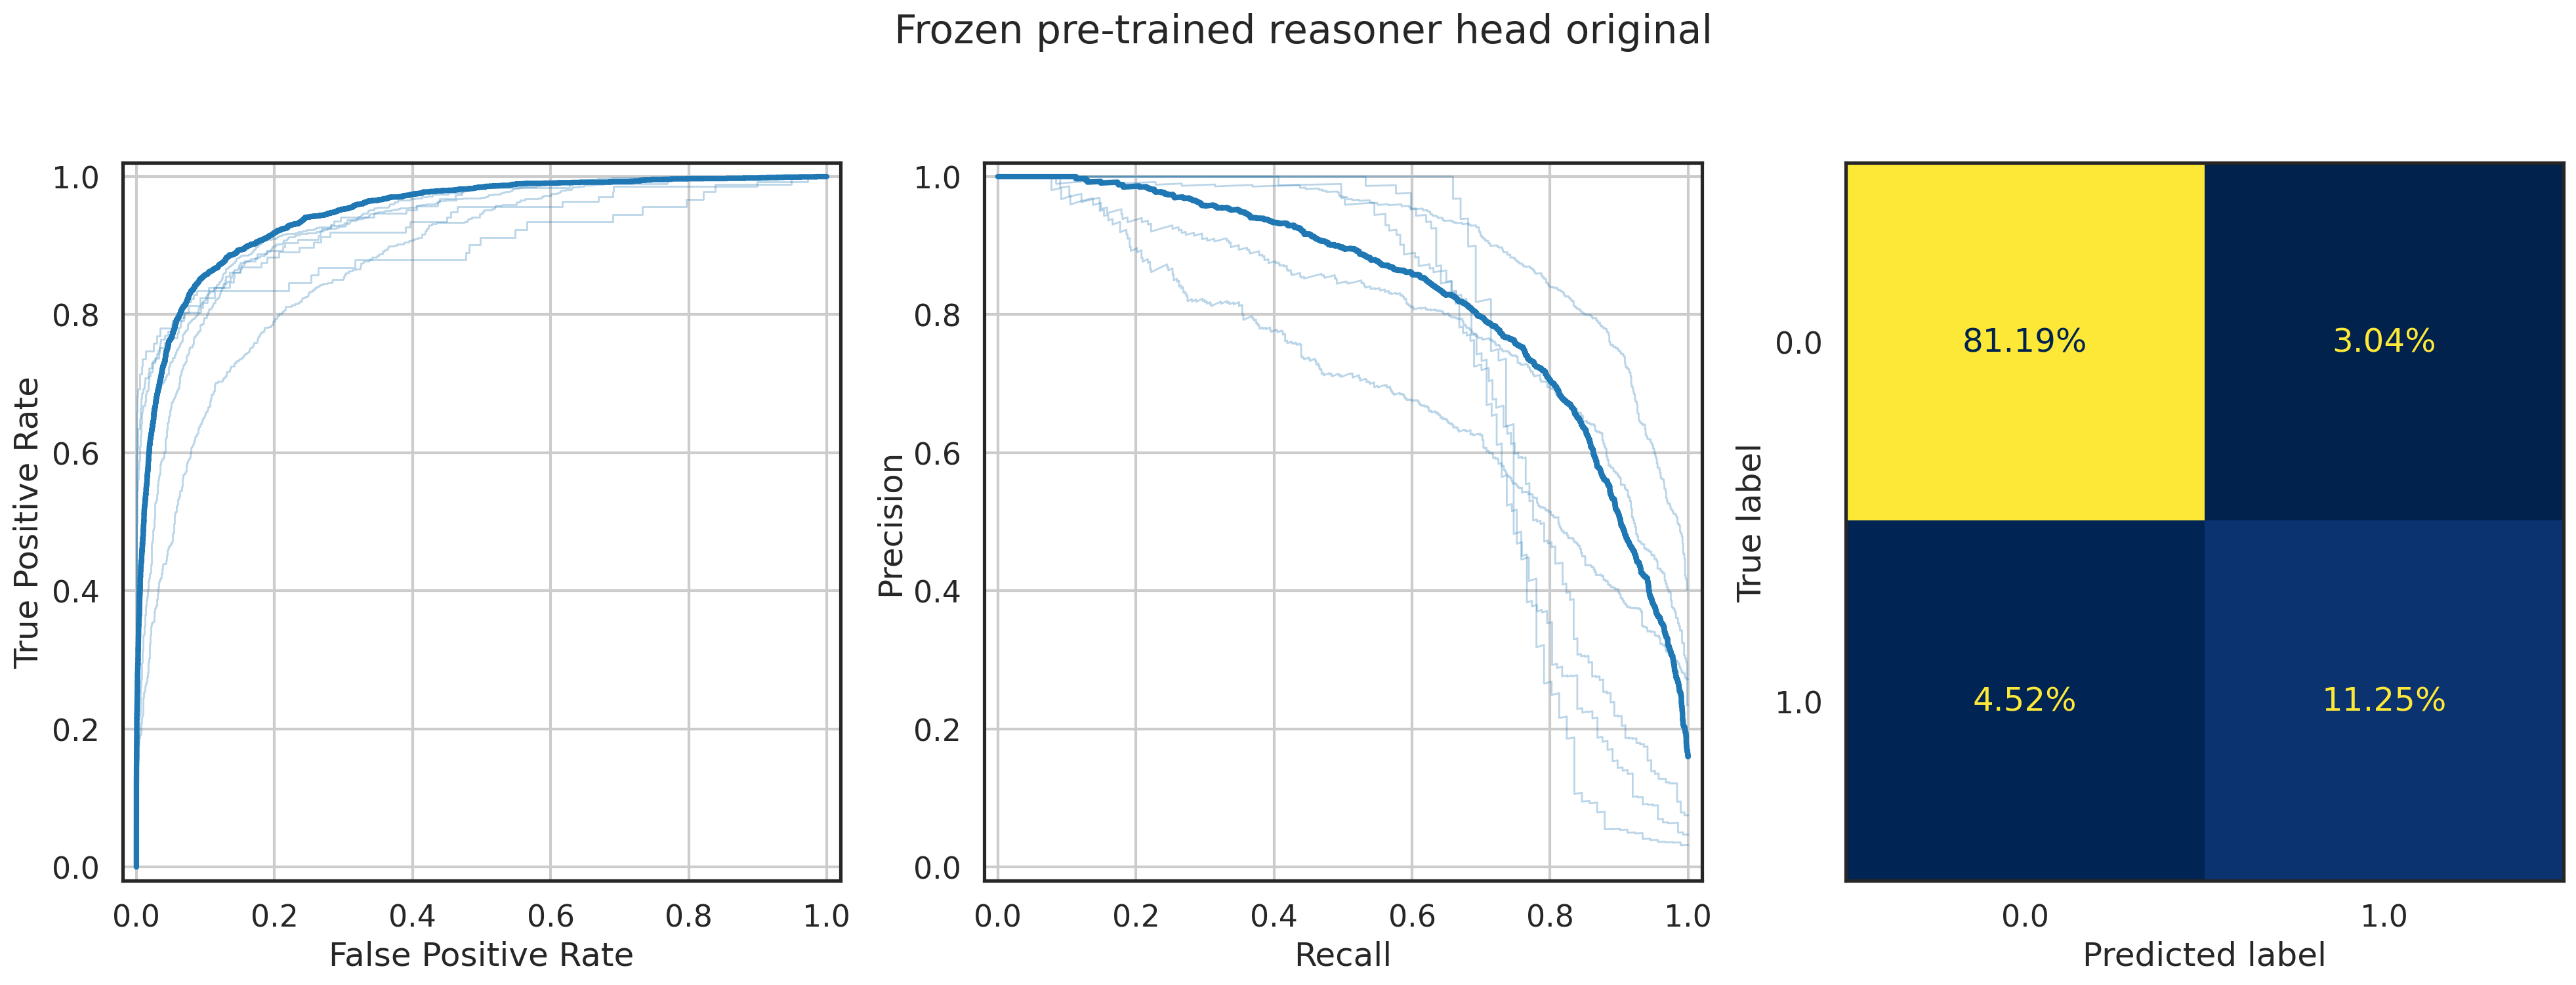

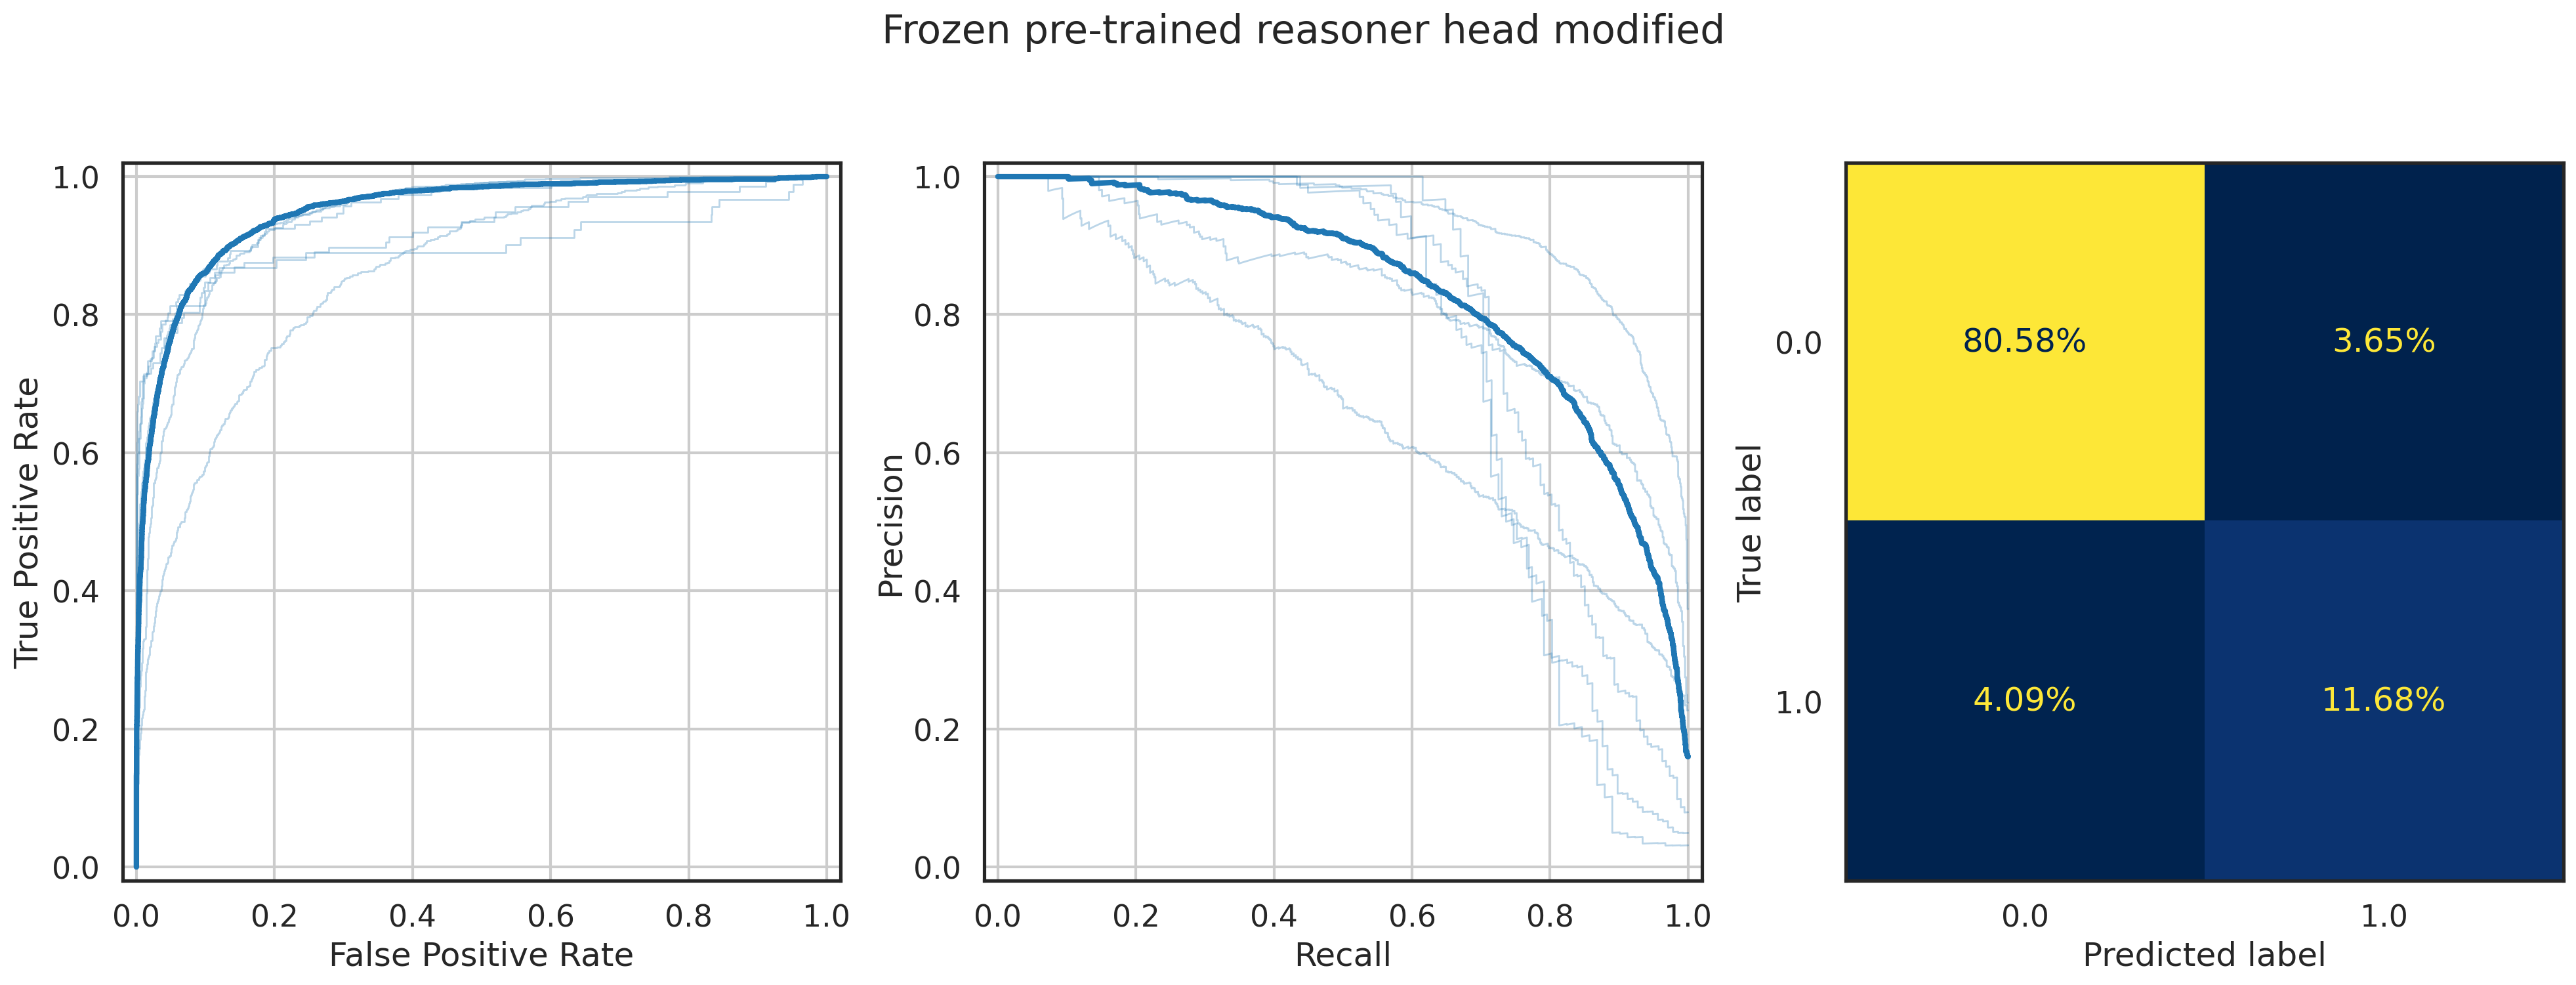

In [6]:
titles = 'Frozen pre-trained reasoner head original', 'Frozen pre-trained reasoner head modified'
logs = transfer_log_orig, transfer_log
heads = transfer_r_orig_head, transfer_r_head
embeddings = transfer_r_orig_embs, transfer_r_embs

base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

for head, embs, log, title in zip(heads, embeddings, logs, titles):
    print('------')
    with T.no_grad():
        head.eval()
        if title == 'Frozen pre-trained reasoner head original':
            _, _, Y_te = eval_batch(head, embs, X_te, y_te, idx_te)
        else:
            _, _, Y_te = eval_batch_mod(head, embs, X_te, y_te, idx_te)

    print(title)
    
    history_tr = pd.DataFrame(log.history_tr)
    test_history_by_onto = pd.DataFrame(log.history_vl_by_onto)
    test_history = pd.DataFrame(log.history_vl)
    test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te=Y_te))
    test_history.to_csv(base+f'/{title} test.csv', index=False)
    test_history_by_onto.to_csv(base+f'/{title} test by onto.csv', index=False)
    test_results.to_csv(base+f'/{title} test clas.csv', index=False)

    print('train time', history_tr.groupby('epoch').max().elapsed.sum())
    print(report(ontos, y_te, Y_te, idx_te).round(4))
    plt.suptitle(title)

In [7]:
onto_names = 'wildlife demacare stuff swo ontodt pizza'.split()
for head, embs, log, title in zip(heads, embeddings, logs, titles):
    df = pd.DataFrame(log.history_vl_by_onto)
    df = df[df.epoch == df.epoch.max()].drop(columns=['epoch', 'run', 'elapsed'])
    df.onto = df.onto.map(onto_names.__getitem__)
    print('-'*10)
    print(title)
    #print(df.agg(['mean', 'std']).round(4).T)
    print(df.round(4))

----------
Frozen pre-trained reasoner head original
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9663  0.6967  0.8169  0.6073   0.9335  0.7749  wildlife
61  0.9850  0.7399  0.8889  0.6337   0.9206  0.7548  demacare
62  0.8867  0.7436  0.7801  0.7104   0.9335  0.8132     stuff
63  0.8410  0.6144  0.5994  0.6302   0.8715  0.6938       swo
64  0.9817  0.7679  0.9286  0.6547   0.9427  0.7848    ontodt
65  0.8623  0.7992  0.8270  0.7733   0.9246  0.8967     pizza
----------
Frozen pre-trained reasoner head modified
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9720  0.7572  0.8452  0.6859   0.9368  0.8080  wildlife
61  0.9843  0.7345  0.8553  0.6436   0.9136  0.7248  demacare
62  0.8787  0.7351  0.7426  0.7277   0.9381  0.8235     stuff
63  0.8203  0.5838  0.5462  0.6269   0.8494  0.6523       swo
64  0.9807  0.7623  0.8857  0.6691   0.9457  0.8075    ontodt
65  0.8880  0.8385  0.8574  0.8203   0.9458  0.9215     pizza


In [8]:
from src.id import print_identity_results
print(print_identity_results(transfer_r_orig_head, transfer_r_orig_embs, seed))

Double Negation:
  Mean Loss: 0.255973
  Std Dev Loss: 0.022848
  Mean Diff: 0.507261
  Std Dev Diff: 0.080649

Duality of Top and Bottom:
  Mean Loss: 0.380861
  Std Dev Loss: 0.000000
  Mean Diff: 0.725492
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.107954
  Std Dev Loss: 0.033192
  Mean Diff: 0.269706
  Std Dev Diff: 0.081861

Associativity:
  Mean Loss: 0.026135
  Std Dev Loss: 0.009043
  Mean Diff: 0.061030
  Std Dev Diff: 0.022710

Commutativity:
  Mean Loss: 0.024807
  Std Dev Loss: 0.012924
  Mean Diff: 0.057978
  Std Dev Diff: 0.030260

Contradiction:
  Mean Loss: 0.385272
  Std Dev Loss: 0.026754
  Mean Diff: 0.821468
  Std Dev Diff: 0.089060

Identity with Top:
  Mean Loss: 0.143403
  Std Dev Loss: 0.038616
  Mean Diff: 0.317218
  Std Dev Diff: 0.089923

Absorption by Bottom:
  Mean Loss: 0.376212
  Std Dev Loss: 0.018035
  Mean Diff: 0.754286
  Std Dev Diff: 0.037673

Top Concept Subsumption:
  Mean Loss: 0.000436
  Std Dev Loss: 0.000293
  Mean Diff: N/A
  Std De

In [9]:
print(print_identity_results(transfer_r_head, transfer_r_embs, seed))

Double Negation:
  Mean Loss: 0.000016
  Std Dev Loss: 0.000008
  Mean Diff: 0.000045
  Std Dev Diff: 0.000028

Duality of Top and Bottom:
  Mean Loss: 0.000812
  Std Dev Loss: 0.000000
  Mean Diff: 0.001541
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.086481
  Std Dev Loss: 0.030754
  Mean Diff: 0.205770
  Std Dev Diff: 0.079199

Associativity:
  Mean Loss: 0.015410
  Std Dev Loss: 0.007011
  Mean Diff: 0.034221
  Std Dev Diff: 0.015584

Commutativity:
  Mean Loss: 0.018079
  Std Dev Loss: 0.010482
  Mean Diff: 0.042160
  Std Dev Diff: 0.025485

Contradiction:
  Mean Loss: 0.174274
  Std Dev Loss: 0.045206
  Mean Diff: 0.263483
  Std Dev Diff: 0.061753

Identity with Top:
  Mean Loss: 0.048731
  Std Dev Loss: 0.021274
  Mean Diff: 0.116638
  Std Dev Diff: 0.055466

Absorption by Bottom:
  Mean Loss: 0.016247
  Std Dev Loss: 0.007308
  Mean Diff: 0.036520
  Std Dev Diff: 0.015334

Top Concept Subsumption:
  Mean Loss: 0.001182
  Std Dev Loss: 0.001283
  Mean Diff: N/A
  Std De